In [1]:
# read data of flight.csv

import pandas as pd
path = 'flights.csv'
flight_data = pd.read_csv(path, dtype={'ORIGIN_AIRPORT': str, 
                                               'DESTINATION_AIRPORT': str})

In [ ]:
data.astypes({'airline':'str','djs':})

In [2]:
airlines=pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [3]:
flight_data.shape

(5819079, 31)

In [4]:
flight_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flight_data[flight_data.columns[0]].unique()

array([2015])

In [76]:
#Different columns of data

flight_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [7]:
flight_data[flight_data.columns[24]].unique()

array([0, 1])

# <font size=10>Visualization 1</font>

In [8]:
#Drop NAN rows of Arrival delay and departure delay

flights_data=flight_data.dropna(axis=0, subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

In [11]:
#Taking only the necessary columns from the flights data 

flights=flights_data.loc[0:5,['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
                           'DEPARTURE_DELAY','DISTANCE','ARRIVAL_DELAY','DIVERTED' ,'AIR_SYSTEM_DELAY','SECURITY_DELAY',
                            'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

In [13]:
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,ANC,SEA,-11.0,1448,-22.0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,LAX,PBI,-8.0,2330,-9.0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,SFO,CLT,-2.0,2296,5.0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,LAX,MIA,-5.0,2342,-9.0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,SEA,ANC,-1.0,1448,-21.0,0,NaN,NaN,NaN,NaN,NaN
5,1,1,4,DL,SFO,MSP,-5.0,1589,8.0,0,NaN,NaN,NaN,NaN,NaN


In [16]:
#Mapping airline data and flights data using Airline code column
flights.drop(columns = {'AIRLINE_y', 'IATA_CODE'})
flights = flights.rename(columns={'AIRLINE_x': 'AIRLINE'})

flights = flights.merge(airlines, left_on='AIRLINE', right_on = 'IATA_CODE', suffixes = ('left', 'right'))

In [20]:
flights = flights.rename(columns={'left': 'IATA_CODE', 'right': 'AIRLINE'})

In [21]:
flights.head()

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODEleft,AIRLINE_y,IATA_CODEright,AIRLINE
0,1,1,4,AS,ANC,SEA,-11.0,1448,-22.0,0,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,AS,Alaska Airlines Inc.
1,1,1,4,AS,SEA,ANC,-1.0,1448,-21.0,0,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,AS,Alaska Airlines Inc.
2,1,1,4,AA,LAX,PBI,-8.0,2330,-9.0,0,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,AA,American Airlines Inc.
3,1,1,4,AA,LAX,MIA,-5.0,2342,-9.0,0,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,AA,American Airlines Inc.
4,1,1,4,US,SFO,CLT,-2.0,2296,5.0,0,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,US,US Airways Inc.


In [12]:
#calculating the fraction or mean arrival and departure delays of different airlines

airline_delay_data=flights.loc[:, ['AIRLINE','DEPARTURE_DELAY','ARRIVAL_DELAY']].groupby('AIRLINE').mean()

In [13]:
airline_delay_data

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE,,
Alaska Airlines Inc.,1.718926,-0.976563
American Airlines Inc.,8.826106,3.451372
American Eagle Airlines Inc.,9.967187,6.457873
Atlantic Southeast Airlines,8.615598,6.585379
Delta Air Lines Inc.,7.313300,0.186754
Frontier Airlines Inc.,13.303352,12.504706
Hawaiian Airlines Inc.,0.469918,2.023093
JetBlue Airways,11.442467,6.677861
Skywest Airlines Inc.,7.736083,5.845652


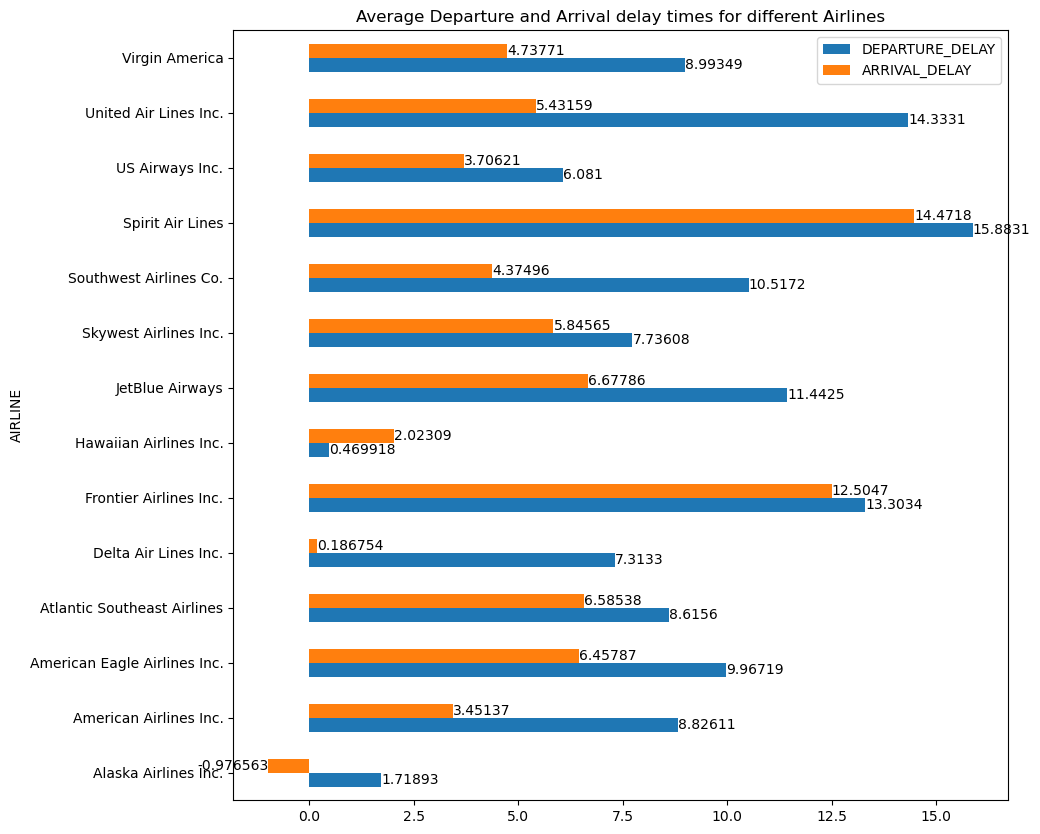

In [14]:
#Plotting stacked arrival and departure delay bar plot

import matplotlib.pyplot as plt 

ax=airline_delay_data.plot(kind='barh',figsize=(10,10),title='Average Departure and Arrival delay times for different Airlines',ylabel='Time in minutes')
for container in ax.containers:
    ax.bar_label(container)

In [15]:
airline=flights.loc[:,'AIRLINE'].unique()

# <font size=10>Visualization 2</font>

In [16]:
airline

array(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'US Airways Inc.', 'Delta Air Lines Inc.', 'Spirit Air Lines',
       'United Air Lines Inc.', 'Hawaiian Airlines Inc.',
       'JetBlue Airways', 'Skywest Airlines Inc.',
       'Atlantic Southeast Airlines', 'Frontier Airlines Inc.',
       'Southwest Airlines Co.', 'American Eagle Airlines Inc.',
       'Virgin America'], dtype=object)

In [17]:
monthly_delays=pd.DataFrame()


In [18]:
#Computing the monthly average delay time of differerent airlines 

for services in airline:
    #print(services)
    airline_delay=flights[flights['AIRLINE']==services] 
    airline_month_delays=airline_delay.loc[:, ['MONTH','ARRIVAL_DELAY']].groupby('MONTH').mean()
    monthly_delays[services]=airline_month_delays

In [19]:
monthly_delays=monthly_delays.fillna(0)
monthly_delays

,Alaska Airlines Inc.,American Airlines Inc.,US Airways Inc.,Delta Air Lines Inc.,Spirit Air Lines,United Air Lines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Atlantic Southeast Airlines,Frontier Airlines Inc.,Southwest Airlines Co.,American Eagle Airlines Inc.,Virgin America
MONTH,,,,,,,,,,,,,,
1,-0.320888,6.955843,3.107457,-2.043847,11.398054,6.352729,3.512640,7.347281,10.889894,8.537497,18.357238,3.389466,18.164974,1.420702
2,-0.782923,7.530204,7.114455,5.614745,16.474466,7.260662,6.029967,18.657673,9.588895,10.417236,27.424179,3.501363,21.301627,7.784410
3,-0.544731,6.693587,3.330787,2.077965,10.039118,4.892212,3.468383,10.741317,3.181693,6.730101,20.074855,3.263341,11.018418,5.348207
4,-3.009003,4.931778,2.660290,0.083343,8.766224,4.376092,0.011022,2.780105,3.223796,4.821253,12.640440,2.996399,5.131228,0.995507
5,-1.716398,5.173878,0.681605,0.149333,22.397347,6.827695,0.826426,-0.709019,4.141162,7.724290,13.007554,5.680777,5.466790,7.102021
6,-0.220621,8.191017,5.766296,4.419594,35.561501,16.932663,0.882786,5.047155,8.338477,13.952793,19.712951,10.743462,9.639323,5.779415
7,0.377408,3.870440,0.000000,1.204862,14.352382,10.262551,2.001586,5.841454,6.790333,6.926421,14.464543,10.504942,3.980289,7.135773
8,2.503899,3.193907,0.000000,0.653114,20.519018,5.014041,7.448029,9.280950,5.606689,5.154422,9.175737,5.532108,1.896565,5.106221
9,-1.813800,-1.432732,0.000000,-3.703377,8.000101,-1.794265,3.696915,3.539154,1.530896,0.851062,0.978460,-1.336260,-2.167268,0.070998


In [20]:
monthly_delays.loc[6,:]

Alaska Airlines Inc.            -0.220621
American Airlines Inc.           8.191017
US Airways Inc.                  5.766296
Delta Air Lines Inc.             4.419594
Spirit Air Lines                35.561501
United Air Lines Inc.           16.932663
Hawaiian Airlines Inc.           0.882786
JetBlue Airways                  5.047155
Skywest Airlines Inc.            8.338477
Atlantic Southeast Airlines     13.952793
Frontier Airlines Inc.          19.712951
Southwest Airlines Co.          10.743462
American Eagle Airlines Inc.     9.639323
Virgin America                   5.779415
Name: 6, dtype: float64

In [21]:
max_values=monthly_delays.loc[6,:].nlargest(3)
min_values=monthly_delays.loc[6,:].nsmallest(3)

In [22]:
max_airlines=pd.DataFrame()

In [23]:
#Seperating airlines with maximum average delay time

for i in range(0,len(max_values)):
    for col in monthly_delays.columns:
        #print(monthly_delays.loc[6,col])
        if(monthly_delays.loc[6,col]==max_values[i]):
            max_airlines[col]=monthly_delays[col]
max_airlines

,Spirit Air Lines,Frontier Airlines Inc.,United Air Lines Inc.
MONTH,,,
1,11.398054,18.357238,6.352729
2,16.474466,27.424179,7.260662
3,10.039118,20.074855,4.892212
4,8.766224,12.640440,4.376092
5,22.397347,13.007554,6.827695
6,35.561501,19.712951,16.932663
7,14.352382,14.464543,10.262551
8,20.519018,9.175737,5.014041
9,8.000101,0.978460,-1.794265


In [24]:
min_airlines=pd.DataFrame()

In [25]:
#Seperating airlines with minimum average delay time

for i in range(0,len(min_values)):
    for col in monthly_delays.columns:
        #print(monthly_delays.loc[6,col])
        if(monthly_delays.loc[6,col]==min_values[i]):
            min_airlines[col]=monthly_delays[col]
min_airlines

,Alaska Airlines Inc.,Hawaiian Airlines Inc.,Delta Air Lines Inc.
MONTH,,,
1,-0.320888,3.512640,-2.043847
2,-0.782923,6.029967,5.614745
3,-0.544731,3.468383,2.077965
4,-3.009003,0.011022,0.083343
5,-1.716398,0.826426,0.149333
6,-0.220621,0.882786,4.419594
7,0.377408,2.001586,1.204862
8,2.503899,7.448029,0.653114
9,-1.813800,3.696915,-3.703377


In [26]:
rem_airlines=pd.DataFrame()

In [27]:
for col in monthly_delays.columns:
    if col in max_airlines.columns or col in min_airlines.columns:
        print('true')
    else:
        rem_airlines[col]=monthly_delays[col]
rem_airlines

true
true
true
true
true
true


,American Airlines Inc.,US Airways Inc.,JetBlue Airways,Skywest Airlines Inc.,Atlantic Southeast Airlines,Southwest Airlines Co.,American Eagle Airlines Inc.,Virgin America
MONTH,,,,,,,,
1,6.955843,3.107457,7.347281,10.889894,8.537497,3.389466,18.164974,1.420702
2,7.530204,7.114455,18.657673,9.588895,10.417236,3.501363,21.301627,7.784410
3,6.693587,3.330787,10.741317,3.181693,6.730101,3.263341,11.018418,5.348207
4,4.931778,2.660290,2.780105,3.223796,4.821253,2.996399,5.131228,0.995507
5,5.173878,0.681605,-0.709019,4.141162,7.724290,5.680777,5.466790,7.102021
6,8.191017,5.766296,5.047155,8.338477,13.952793,10.743462,9.639323,5.779415
7,3.870440,0.000000,5.841454,6.790333,6.926421,10.504942,3.980289,7.135773
8,3.193907,0.000000,9.280950,5.606689,5.154422,5.532108,1.896565,5.106221
9,-1.432732,0.000000,3.539154,1.530896,0.851062,-1.336260,-2.167268,0.070998


In [28]:
#Plot the line plot of average delay time of all the airline in different months of the year

import plotly.graph_objs as go
import random

f = go.FigureWidget()
f.layout.hovermode = 'closest'
f.layout.hoverdistance = -1 
default_linewidth = 2
highlighted_linewidth_delta = 2

num_of_traces = 5
random.seed = 42
for i in range(0,len(rem_airlines.columns)):
    trace = go.Scatter(y=rem_airlines.iloc[:,i], mode='markers+lines',hoverinfo='name+y', opacity=0.15, line={ 'width': default_linewidth },marker={'symbol':'circle'},name=str(rem_airlines.columns[i]))
    f.add_trace(trace)

for i in range(0,len(max_airlines.columns)):
    trace = go.Scatter(y=max_airlines.iloc[:,i], mode='markers+lines',hoverinfo='name+y', line={ 'width': default_linewidth },marker={'symbol':'circle'},name=str(max_airlines.columns[i]))
    f.add_trace(trace)
    
for i in range(0,len(min_airlines.columns)):
    trace = go.Scatter(y=min_airlines.iloc[:,i], mode='markers+lines',hoverinfo='name+y', line={ 'width': default_linewidth },marker={'symbol':'circle'},name=str(min_airlines.columns[i]))
    f.add_trace(trace)
f.update_layout(
    
    title="Average monthly delay times of different airlines",
    xaxis_title="months",
    yaxis_title="Average delay time",
    width=1000,
    height=700,
)
def update_trace(trace, points, selector):
    if len(points.point_inds) == 0:
        return
        
    for i,_ in enumerate(f.data):
        f.data[i]['line']['width'] = default_linewidth + highlighted_linewidth_delta * (i == points.trace_index)
        f.data[i]['opacity']=1.0*(i == points.trace_index)+ 0.2*(i != points.trace_index)
        
        
for i in range( len(f.data) ):
    f.data[i].on_click(update_trace)

f

FigureWidget({
    'data': [{'hoverinfo': 'name+y',
              'line': {'width': 2},
              'marker'…

# <font size=10>Visualization 3</font>

In [29]:
#loading airports locations csv file

airport = pd.read_csv('airports.csv')

In [30]:
flights['DELAY_OR_NOT'] = flights.loc[:, ['ARRIVAL_DELAY']] > 0

In [31]:
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [32]:
flights

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY_OR_NOT
0,1,1,4,AS,ANC,SEA,-11.0,1448,-22.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,False
1,1,1,4,AS,SEA,ANC,-1.0,1448,-21.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,False
2,1,1,4,AS,ANC,SEA,-4.0,1448,-14.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,False
3,1,1,4,AS,ANC,PDX,-4.0,1542,-18.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,False
4,1,1,4,AS,FAI,SEA,-8.0,1533,-3.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,12,31,4,VX,LGA,DAL,-8.0,1381,-6.0,0,NaN,NaN,NaN,NaN,NaN,Virgin America,False
5714004,12,31,4,VX,BOS,SFO,-10.0,2704,-46.0,0,NaN,NaN,NaN,NaN,NaN,Virgin America,False
5714005,12,31,4,VX,SFO,LAS,-7.0,414,-18.0,0,NaN,NaN,NaN,NaN,NaN,Virgin America,False
5714006,12,31,4,VX,LAX,LAS,-2.0,236,-11.0,0,NaN,NaN,NaN,NaN,NaN,Virgin America,False


In [33]:
airport = airport.rename(columns={'IATA_CODE': 'DESTINATION_AIRPORT'})

In [34]:
#Computing delay times and fraction of delayed flights of different airports of USA

airports_flights_data=flights[flights.ORIGIN_AIRPORT.str.isalpha()]
airport_no_flights=airports_flights_data.loc[:,['DESTINATION_AIRPORT','DELAY_OR_NOT']].groupby('DESTINATION_AIRPORT').count()
airport_no_flights = airport_no_flights.rename(columns={'DELAY_OR_NOT': 'FLIGHTS'})

delayed_flights_data=airports_flights_data[airports_flights_data['DELAY_OR_NOT']==1]
airport_no_delays=delayed_flights_data.loc[:,['DESTINATION_AIRPORT','DELAY_OR_NOT']].groupby('DESTINATION_AIRPORT').count()

airport_no_flights=airport_no_flights.merge(airport_no_delays,on='DESTINATION_AIRPORT')

In [35]:
airport_no_flights

,FLIGHTS,DELAY_OR_NOT
DESTINATION_AIRPORT,,
ABE,2220,840
ABI,2224,748
ABQ,18953,7876
ABR,657,163
ABY,864,347
...,...,...
WRG,652,259
WYS,207,119
XNA,8986,3920


In [36]:
airport_no_flights['fraction of delayed_flights']=airport_no_flights['DELAY_OR_NOT']/airport_no_flights['FLIGHTS']

In [37]:
airport_no_flights

,FLIGHTS,DELAY_OR_NOT,fraction of delayed_flights
DESTINATION_AIRPORT,,,
ABE,2220,840,0.378378
ABI,2224,748,0.336331
ABQ,18953,7876,0.415554
ABR,657,163,0.248097
ABY,864,347,0.401620
...,...,...,...
WRG,652,259,0.397239
WYS,207,119,0.574879
XNA,8986,3920,0.436234


In [38]:
airport_delay_time=delayed_flights_data.loc[:, ['DESTINATION_AIRPORT','ARRIVAL_DELAY']].groupby('DESTINATION_AIRPORT').mean()
airport_delay_time

,ARRIVAL_DELAY
DESTINATION_AIRPORT,
ABE,31.459524
ABI,31.830214
ABQ,28.017395
ABR,24.453988
ABY,34.138329
...,...
WRG,32.019305
WYS,10.336134
XNA,33.655867


In [39]:
#Merging average arrival time and fraction of delayed flights data into airports dataframe

airport = airport.merge(airport_no_flights['fraction of delayed_flights'], on='DESTINATION_AIRPORT')
airport = airport.merge(airport_delay_time['ARRIVAL_DELAY'], on='DESTINATION_AIRPORT')

In [40]:
airport

,DESTINATION_AIRPORT,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,fraction of delayed_flights,ARRIVAL_DELAY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,0.378378,31.459524
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,0.336331,31.830214
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,0.415554,28.017395
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,0.248097,24.453988
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,0.401620,34.138329
...,...,...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,0.397239,32.019305
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,0.574879,10.336134
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,0.436234,33.655867
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023,0.343558,23.562500


In [41]:
from statistics import median
flights_median= median(airport.loc[:,'fraction of delayed_flights'])
delaytime_median= median(airport.loc[:,'ARRIVAL_DELAY'])

In [42]:
#Calculating few statistical parameters to use them in altering the color and size of the marks of each airport.

import numpy as np
flights_25=np.percentile(airport.loc[:,'fraction of delayed_flights'], 25)
flights_75=np.percentile(airport.loc[:,'fraction of delayed_flights'], 75)
time_25=np.percentile(airport.loc[:,'ARRIVAL_DELAY'], 25)
time_75=np.percentile(airport.loc[:,'ARRIVAL_DELAY'], 75)

In [43]:
from vega_datasets import data

In [44]:
import altair as alt

#alt.renderers.enable('notebook')
# alt.renderers.enable('jupyterlab')
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [45]:
#Loading USA states location data on US map

usmap = data.us_10m()
usmap.keys()
state1 = usmap['objects']['states']['geometries'][1]
state1
states = alt.topo_feature(data.us_10m.url, 'states')

In [46]:
type(airport['LATITUDE'][0])

numpy.float64

In [47]:
airlne_airports=airports_flights_data.loc[:,['DESTINATION_AIRPORT','AIRLINE','ARRIVAL_DELAY']].groupby(['DESTINATION_AIRPORT','AIRLINE']).mean()

In [48]:
airline_airports=airlne_airports.pivot_table('ARRIVAL_DELAY',['DESTINATION_AIRPORT'],'AIRLINE')

In [49]:
airline_airports

AIRLINE,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
DESTINATION_AIRPORT,,,,,,,,,,,,,,
ABE,NaN,NaN,NaN,6.067669,3.990228,NaN,NaN,NaN,6.882353,NaN,NaN,NaN,NaN,NaN
ABI,NaN,NaN,4.081385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABQ,-17.389222,4.414607,8.065789,2.792593,-0.789006,NaN,NaN,4.483395,5.499386,7.204917,NaN,9.428571,9.02924,NaN
ABR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.389650,NaN,NaN,NaN,NaN,NaN
ABY,NaN,NaN,NaN,8.681713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,5.375767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193237,NaN,NaN,NaN,NaN,NaN
XNA,NaN,-8.055556,12.202115,6.778879,-0.104089,NaN,NaN,NaN,5.822258,NaN,NaN,NaN,NaN,NaN


In [50]:
min_delay_time = airline_airports.min(axis = 1)
mindelay_airline=airline_airports.idxmin(axis = 1)
max_delay_time = airline_airports.max(axis = 1)
max_delay_airline = airline_airports.idxmax(axis = 1)

In [51]:
delays=pd.DataFrame()
delays['min_delay_time']=min_delay_time
delays['mindelay_airline']=mindelay_airline
delays['max_delay_time']=max_delay_time
delays['max_delay_airline']=max_delay_airline

In [52]:
delays

,min_delay_time,mindelay_airline,max_delay_time,max_delay_airline
DESTINATION_AIRPORT,,,,
ABE,3.990228,Delta Air Lines Inc.,6.882353,Skywest Airlines Inc.
ABI,4.081385,American Eagle Airlines Inc.,4.081385,American Eagle Airlines Inc.
ABQ,-17.389222,Alaska Airlines Inc.,9.428571,US Airways Inc.
ABR,-3.389650,Skywest Airlines Inc.,-3.389650,Skywest Airlines Inc.
ABY,8.681713,Atlantic Southeast Airlines,8.681713,Atlantic Southeast Airlines
...,...,...,...,...
WRG,5.375767,Alaska Airlines Inc.,5.375767,Alaska Airlines Inc.
WYS,4.193237,Skywest Airlines Inc.,4.193237,Skywest Airlines Inc.
XNA,-8.055556,American Airlines Inc.,12.202115,American Eagle Airlines Inc.


In [53]:
airport=airport.merge(delays, on='DESTINATION_AIRPORT')

In [54]:
airport=airport.rename(columns={'ARRIVAL_DELAY': 'Average delay time'})

In [55]:
airport

,DESTINATION_AIRPORT,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,fraction of delayed_flights,Average delay time,min_delay_time,mindelay_airline,max_delay_time,max_delay_airline
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,0.378378,31.459524,3.990228,Delta Air Lines Inc.,6.882353,Skywest Airlines Inc.
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,0.336331,31.830214,4.081385,American Eagle Airlines Inc.,4.081385,American Eagle Airlines Inc.
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,0.415554,28.017395,-17.389222,Alaska Airlines Inc.,9.428571,US Airways Inc.
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,0.248097,24.453988,-3.389650,Skywest Airlines Inc.,-3.389650,Skywest Airlines Inc.
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,0.401620,34.138329,8.681713,Atlantic Southeast Airlines,8.681713,Atlantic Southeast Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,0.397239,32.019305,5.375767,Alaska Airlines Inc.,5.375767,Alaska Airlines Inc.
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,0.574879,10.336134,4.193237,Skywest Airlines Inc.,4.193237,Skywest Airlines Inc.
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,0.436234,33.655867,-8.055556,American Airlines Inc.,12.202115,American Eagle Airlines Inc.
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023,0.343558,23.562500,0.371166,Alaska Airlines Inc.,0.371166,Alaska Airlines Inc.


In [56]:
airport.dtypes

DESTINATION_AIRPORT             object
AIRPORT                         object
CITY                            object
STATE                           object
COUNTRY                         object
LATITUDE                       float64
LONGITUDE                      float64
fraction of delayed_flights    float64
Average delay time             float64
min_delay_time                 float64
mindelay_airline                object
max_delay_time                 float64
max_delay_airline               object
dtype: object

In [57]:
# Plotting altair char of the delay times and fraction of delayed flights at different airports 

states = alt.topo_feature(data.us_10m.url, feature='states')
airports = data.airports()

background = alt.Chart(states).mark_geoshape(
    fill='white',
    stroke='black'
).project('albersUsa').properties(
    width=800,
    height=600
    #alt.txt('states')
)
scale = alt.Scale(
    domain=[0,flights_25, flights_median,flights_75, 0.65],
    range=[10, 160, 320, 640, 800],
    #range=[1, 160, 320,640, 1000],
    type='linear'
)

scale1 = alt.Scale(
    domain=[13,time_25,delaytime_median,time_75,max(airport.loc[:,'Average delay time'])],
    range=['blue','green', 'yellow','orange', 'red'],
    type='linear'
)
#alt.Scale(range=[1, 1000])
points = alt.Chart(airport).mark_circle().encode(
    longitude='LONGITUDE',
    latitude='LATITUDE',
    size=alt.Size('fraction of delayed_flights:Q',scale=scale),
    color=alt.Color('Average delay time', scale=scale1),
    tooltip=['fraction of delayed_flights','Average delay time','AIRPORT','mindelay_airline','min_delay_time:Q','max_delay_airline','max_delay_time:Q']
)

background + points

alt.LayerChart(...)

# <font size =10> Visualization 4</font>

In [58]:
#Seperating cancelled flights data 

Cancelled=flight_data.loc[:,['AIRLINE','CANCELLED']].groupby('AIRLINE').mean()
Cancelled=Cancelled.round(3)


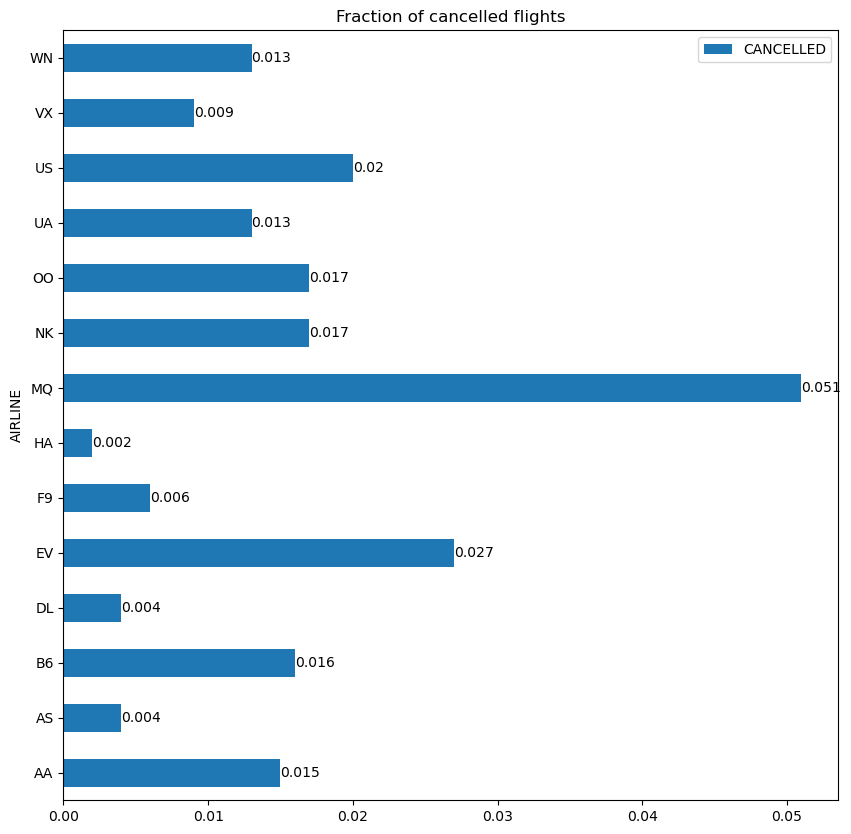

In [59]:
#Plotting cancelled flights data

import matplotlib.pyplot as plt
ax=Cancelled.plot(kind='barh',figsize=(10,10),title='Fraction of cancelled flights')
for container in ax.containers:
    ax.bar_label(container)

## <font size =10> Visualization 5</font> 

In [60]:

delay_reason=flights.dropna(subset=['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],how='all')

In [61]:
delay_reason

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY_OR_NOT
37,1,1,4,AS,SLC,SJC,67.0,584,50.0,0,0.0,0.0,0.0,0.0,50.0,Alaska Airlines Inc.,True
52,1,1,4,AS,BUR,SEA,124.0,937,120.0,0,0.0,0.0,0.0,0.0,120.0,Alaska Airlines Inc.,True
57,1,1,4,AS,SAN,OGG,-4.0,2541,24.0,0,24.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,True
63,1,1,4,AS,SEA,SFO,8.0,679,26.0,0,18.0,0.0,8.0,0.0,0.0,Alaska Airlines Inc.,True
65,1,1,4,AS,OAK,OGG,19.0,2349,29.0,0,10.0,0.0,19.0,0.0,0.0,Alaska Airlines Inc.,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713978,12,31,4,VX,LAX,LAS,83.0,236,82.0,0,0.0,0.0,0.0,82.0,0.0,Virgin America,True
5713987,12,31,4,VX,LAX,DAL,111.0,1246,80.0,0,0.0,0.0,0.0,80.0,0.0,Virgin America,True
5713990,12,31,4,VX,DAL,SFO,48.0,1476,42.0,0,0.0,0.0,0.0,42.0,0.0,Virgin America,True
5713992,12,31,4,VX,DAL,LAS,29.0,1067,36.0,0,7.0,0.0,0.0,29.0,0.0,Virgin America,True


In [62]:
delayed_flights=delay_reason.loc[:,['AIRLINE','SECURITY_DELAY']].groupby('AIRLINE').count()
delayed_flights

,SECURITY_DELAY
AIRLINE,
Alaska Airlines Inc.,22352
American Airlines Inc.,130279
American Eagle Airlines Inc.,60547
Atlantic Southeast Airlines,109184
Delta Air Lines Inc.,118023
Frontier Airlines Inc.,23570
Hawaiian Airlines Inc.,8618
JetBlue Airways,59175
Skywest Airlines Inc.,107795


In [63]:
#Getting data of number of delayed flight because of given reason grouping with respect to different airlines.


delay_airlines=pd.DataFrame()
delay_airlines=delay_reason.loc[:,['AIRLINE','ARRIVAL_DELAY']].groupby('AIRLINE').count()
#delay_airlines.rename(column={'SECURITY_DELAY': 'DELAYS'})
list1=['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
for i in range(0,len(list1)):
    temp=delay_reason[delay_reason.loc[:,list1[i]]!=0]
    delayed_temp=temp.loc[:,['AIRLINE',list1[i]]].groupby('AIRLINE').count()
    delay_airlines=delay_airlines.merge(delayed_temp,on='AIRLINE')
delay_airlines

,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
AIRLINE,,,,,,
Alaska Airlines Inc.,22352,14897,250,8363,7866,867
American Airlines Inc.,130279,70383,731,68656,57590,9967
American Eagle Airlines Inc.,60547,35806,308,27236,32125,9105
Delta Air Lines Inc.,118023,64230,58,63128,50112,11838
Hawaiian Airlines Inc.,8618,325,29,7395,4877,572
JetBlue Airways,59175,33913,433,38665,31684,2173
Skywest Airlines Inc.,107795,58509,345,39127,62432,4426
Southwest Airlines Co.,236626,97772,554,144524,163188,10086
Spirit Air Lines,34221,28378,299,17307,11722,925


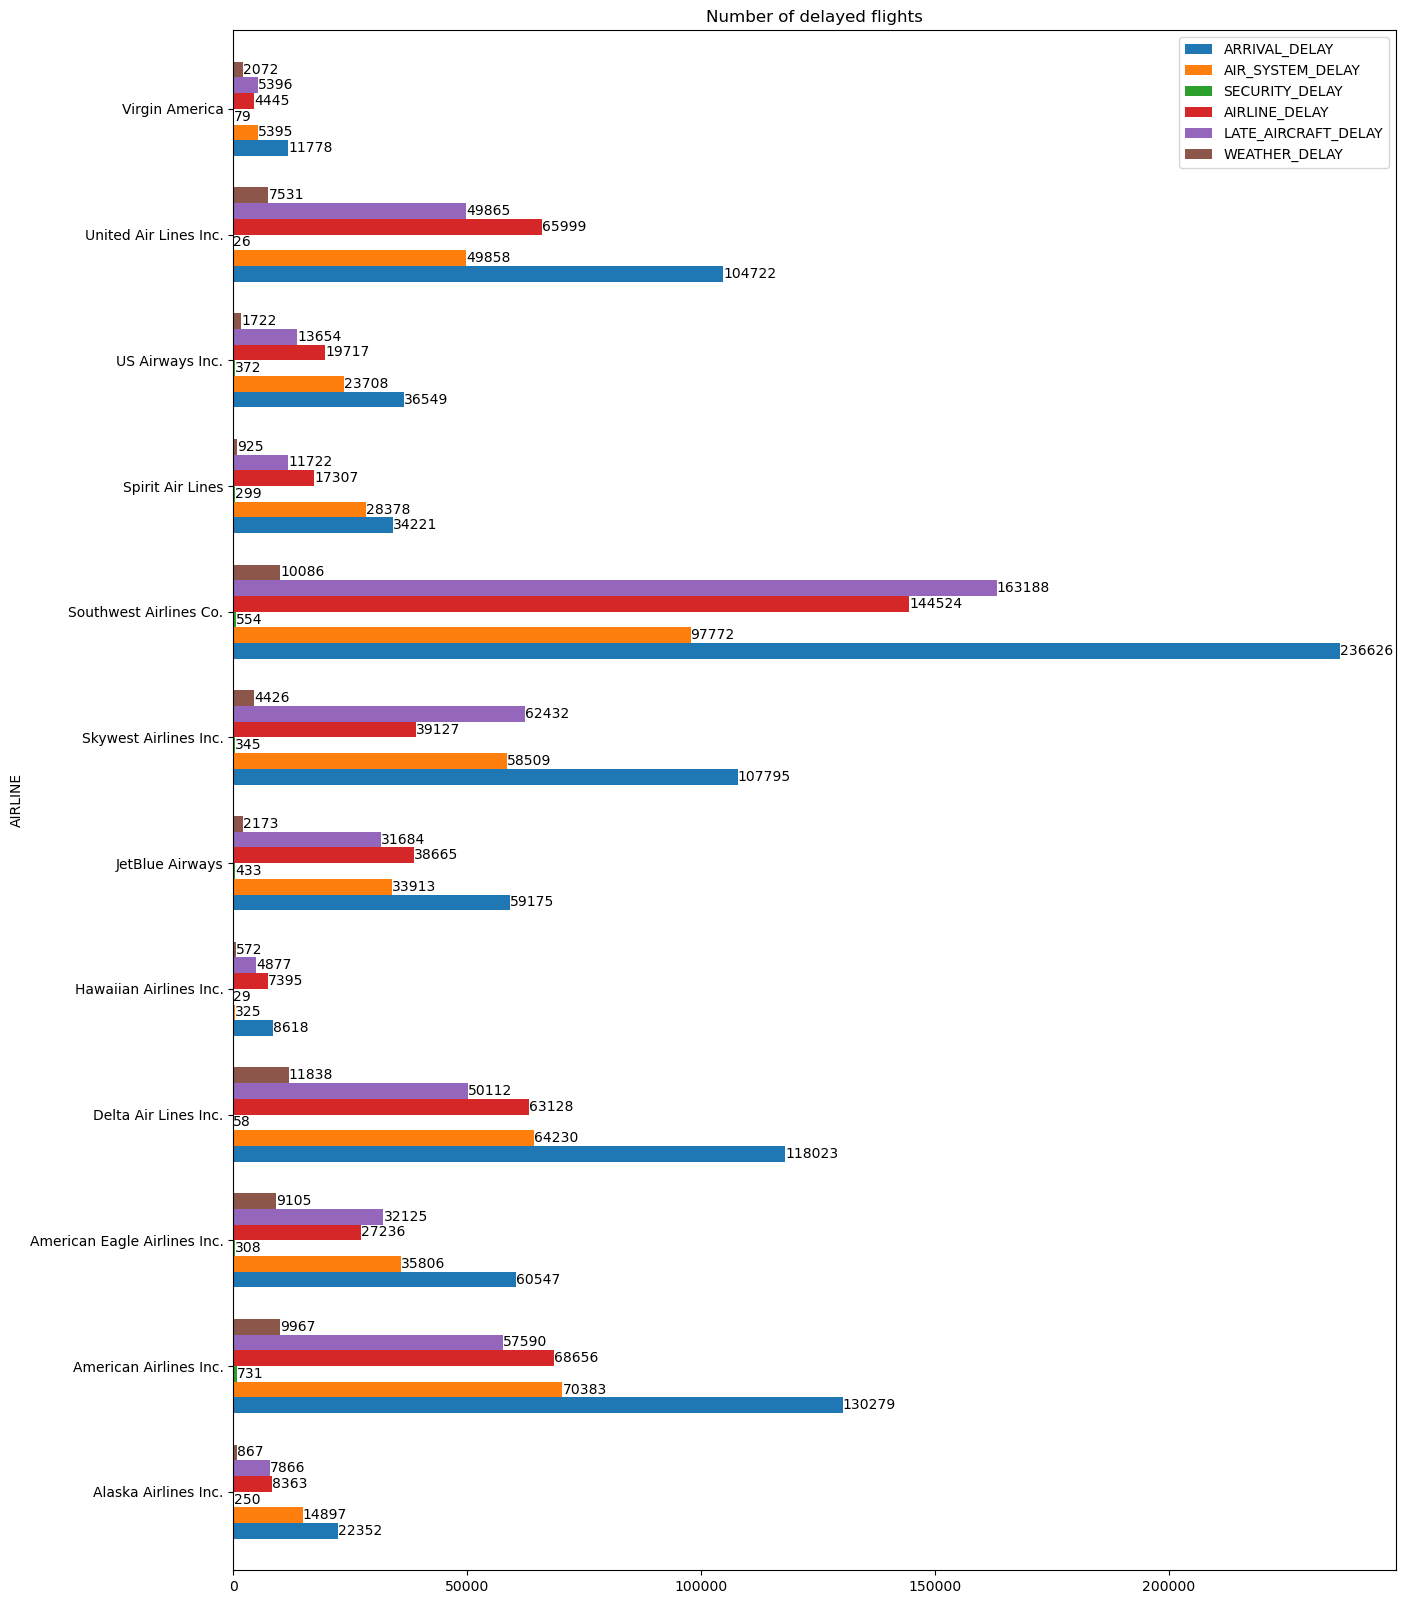

In [64]:
#Plotting airlines data w.r.t delay reason for all the airlines

ax=delay_airlines.plot(kind='barh',figsize=(15,20),title='Number of delayed flights',ylabel='Number of flights delayed',width=0.75)
for container in ax.containers:
    #,width=1ax.setp(container, width=10)
    ax.bar_label(container)